## Observations and Insights 

## Pymaceuticals Inc

Summary: 

250 mice were treated through a variety of drug regimes over the course of 45 days. Their physiological responses were then monitored over the course of that time. This analysis compaires the four treatments Capomulin, Infubinol, Ketapril, and Placebo.




In [22]:
%matplotlib inline

In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
#import warnings
#warnings.filterwarnings('ignore')

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single dataset - set mouse id as primary key
mouse_data_df = pd.merge(study_results, mouse_metadata,how='outer', on="Mouse ID")

# Display the data table for preview
mouse_data_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [24]:
# Checking the number of mice.
n = len(pd.unique(mouse_data_df['Mouse ID']))
print("The number of mice in this study are: ", n)


The number of mice in this study are:  249


In [25]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_data_duplicate_df = mouse_data_df[mouse_data_df.duplicated(['Mouse ID', 'Timepoint'])]
mouse_data_duplicate_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [26]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_duplicate_df = mouse_data_df[mouse_data_df.duplicated(['Mouse ID'])]
mouse_duplicate_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
5,b128,25,43.262145,1,Capomulin,Female,9,22


In [27]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_unique_df = mouse_data_df.drop_duplicates(subset = ['Mouse ID'])
mouse_unique_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
10,f932,0,45.0,0,Ketapril,Male,15,29
11,g107,0,45.0,0,Ketapril,Female,2,29
19,a457,0,45.0,0,Ketapril,Female,11,30
22,c819,0,45.0,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1848,t565,0,45.0,0,Capomulin,Female,20,17
1858,i557,0,45.0,0,Capomulin,Female,1,24
1868,m957,0,45.0,0,Capomulin,Female,3,19
1878,f966,0,45.0,0,Capomulin,Male,16,17


In [28]:
# Checking the number of mice in the clean DataFrame.
x = len((mouse_data_df['Mouse ID']))
print("The number of mice in this study are: ", x)



The number of mice in this study are:  1893


## Summary Statistics

In [29]:
# group the mouse data by drug regimen
regimen_group_by = mouse_data_df.groupby(['Drug Regimen'])
regimen_group_by.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
10,f932,0,45.000000,0,Ketapril,Male,15,29
11,g107,0,45.000000,0,Ketapril,Female,2,29
12,g107,5,48.791665,0,Ketapril,Female,2,29
13,g107,10,53.435987,0,Ketapril,Female,2,29
14,g107,15,58.135545,0,Ketapril,Female,2,29


In [46]:
# Generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties
# of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

avg_tumor_vol = round(regimen_group_by['Tumor Volume (mm3)'].mean(),2)

median_tumor_vol =  round(regimen_group_by['Tumor Volume (mm3)'].median(),2)


variance_tumor_volumn =  round(regimen_group_by['Tumor Volume (mm3)'].var(),2)

standard_deviation_tv = round(regimen_group_by['Tumor Volume (mm3)'].std(),2)

sem_tv = round(regimen_group_by['Tumor Volume (mm3)'].sem(),2)

summary_tumor_volumn_df = pd.DataFrame({'Average Tumor Volume': avg_tumor_vol,
                 'Median Tumor Volume': median_tumor_vol,
                 'Variance Tumor Volumne': variance_tumor_volumn,
                 'Std of Tumor Volumne': standard_deviation_tv,
                 'SEM of Tumor Volumne': sem_tv})

summary_tumor_volumn_df



,Average Tumor Volume,Median Tumor Volume,Variance Tumor Volumne,Std of Tumor Volumne,SEM of Tumor Volumne
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [50]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

summary_tbl = regimen_group_by.agg(['mean','median','var','std','sem'])['Tumor Volume (mm3)']
summary_tbl

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [87]:
# Generate a bar plot showing the total number of timepoints for all mice tested 
#for each drug regimen using Pandas.

plot_data = regimen_group_by[['Drug Regimen','Timepoint']]

# plot_data.plot.bar()

#regimen_group_by.plot(x='Timepoint',y='Drug Regimen')

#pass



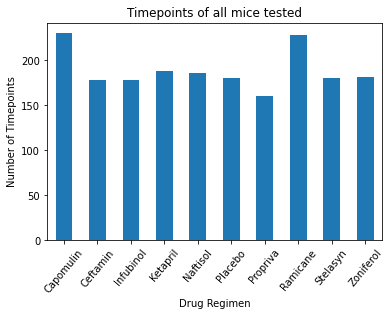

In [72]:
# Generate a bar plot showing the total number of timepoints for all mice tested 
#for each drug regimen using pyplot.

total_timepoints = regimen_group_by.count()['Timepoint']
plt.ylabel('Number of Timepoints')
plt.title('Timepoints of all mice tested')
total_timepoints.plot.bar(legend=False,rot=50)
# use pass to suppress jupyter metadata for plot
pass


In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas



In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
